# Модуль №15. Нейронные сети и машинное зрение

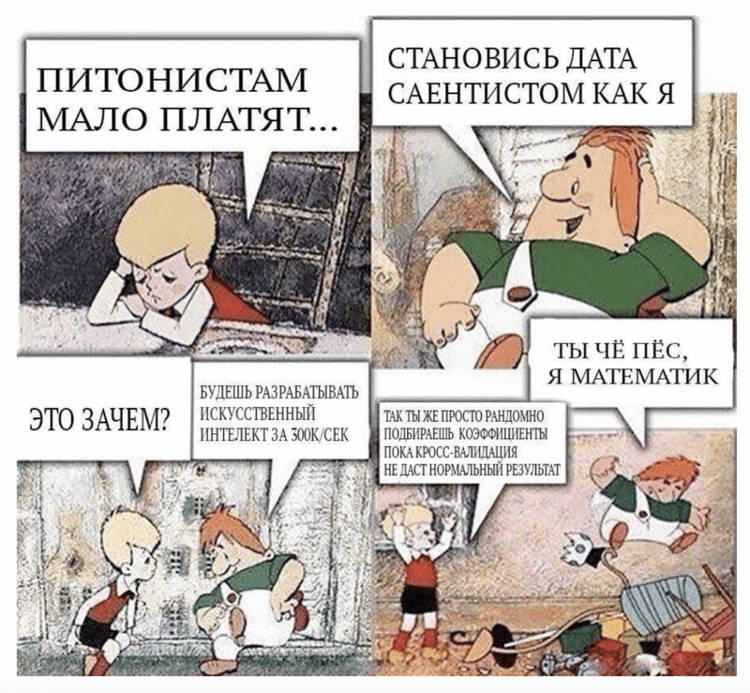

## Содержание

1. Как пользоваться Google Colab
2. Как установить Anaconda на компьютер
3. Материалы по `markdown`
4. Где используется machine learning?
5. Краткий обзор методов машинного обучения  
6. Анализ данных с помощью библиотек `pandas`
7. Задача классификации (на табличных данных)
8. Задача регрессии (на табличных данных)
9. Нейронные сети
10. Телеграм канал дата энтузиастки тут @sashshashaa

## Как пользоваться Google Colab

1. Как создать новый ноутбук / открыть уже существующий ноутбук
2. Как скопировать чужой ноутбук
3. Как создавать, удалять, перемещать ячейки
4. Как запускать ячейку? `Shift + Enter`
5. Как примонтировать свой Google Drive
6. Как загружать данные для текущей сессии
7. Как перезапустить сессию
8. Как сохранить и скачать ноутбук


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Как установить Anaconda на компьютер

1. Идем на сайт https://www.anaconda.com ----> `Free Download` ----> `Skip Registation` ----> `Download`
2. Открываем приложение `Anaconda` ----> переходим в `Environments` ----> создаем новое окружение ----> в выпадающем списке выбираем созданное окружение ----> нажимаем на `Install` под `Jupyter Notebook` или `Jupyter Lab` ----> когда загрузка закончится, нажимаем на `Launch` ----> ноутбук открыт
3. Чтобы создать новый ноутбук, нужно нажать на `New Launcher` и выбрать `Notebook`

## Материалы по `Markdown`

Курсы Stepik по Markdown
- [Мини-курс по Markdown](https://stepik.org/course/181463)
- [Большой курс по Markdown](https://stepik.org/course/186514)
- [Markdown](https://stepik.org/course/187888)

## Где используется machine learning?

1. **Рекомендательные системы** — такие как YouTube, Netflix, и Amazon.
2. **Обработка изображений и видео** — распознавание лиц, автоматическая маркировка на фото.
3. **Обработка естественного языка (NLP)** — чат-боты, переводчики, анализ текста.
4. **Медицинская диагностика** — выявление болезней, анализ медицинских снимков.
5. **Финансовый сектор** — обнаружение мошенничества, кредитные рейтинги, прогнозирование рынка.
6. **Автономные системы** — самоуправляемые автомобили, дроны.
7. **Кибербезопасность** — обнаружение вторжений и вредоносного ПО.
8. **Робототехника** — обучение роботов для выполнения сложных задач.

## Краткий обзор методов машинного обучения

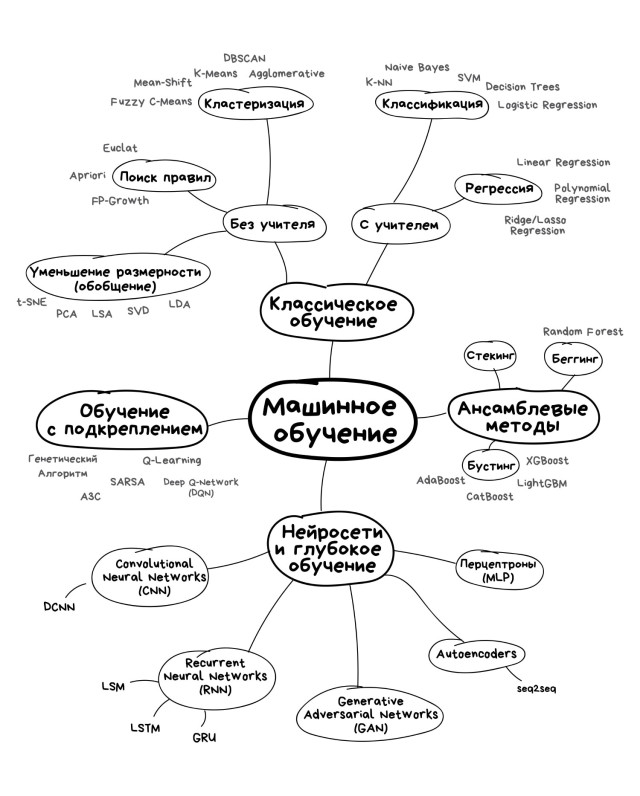

## Подключение необходимых библиотек

`pip install pytorch-tabnet`

`pip install torch`

`pip install torchvision`


In [2]:
# Библиотеки для анализа данных
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


# Библиотеки для визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
%matplotlib inline


# Библиотеки для выполнения HTTP-запросов и работы с файловой системой
import requests
import os


# Библиотека sklearn для препроцессинга и классического машинного обучения
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree # — позволяет визуализировать структуру дерева решений

# train_test_split — разбивает данные на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split

# StandardScaler — масштабирует данные, приводя их к стандартному распределению
from sklearn.preprocessing import StandardScaler


# Метрики качества для классификации и регрессии
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


# Библиотека PyTorch для глубокого обучения

# torch — основная библиотека для работы с тензорами и построения нейронных сетей
# nn — содержит модули для построения нейронных сетей, включая слои
# optim — модуль для оптимизаторов (например, Adam, SGD)
# F — содержит различные функции активации и потерь
# transforms — содержит инструменты для преобразования изображений (нормализация, изменение размеров и т.д.)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models

# TabNetClassifier — специализированная архитектура нейронных сетей для табличных данных
from pytorch_tabnet.tab_model import TabNetClassifier


# PIL — библиотека для работы с изображениями (открытие, преобразование, сохранение изображений)
from PIL import Image


# Отключаем предупреждения для более чистого вывода
import warnings
warnings.filterwarnings("ignore")

## Анализ данных с помощью библиотек `pandas`

- Подключение необходимых библиотек
- Загрузка и сохранение данных
- Создание датасета
- Просмотр и изучение данных
- Фильтрация и выбор данных
- Очистка данных
- Манипуляции с данными (группировка, сортировка)
- Объединение данных
- Построение простых визуализаций

In [3]:
x = 4

In [4]:
print(x)

4


In [5]:
x = 5

### Генерация и сохранение данных

In [6]:
series = pd.Series([1, 2, 3, 4, 5])
series

,0
0,1
1,2
2,3
3,4
4,5


In [7]:
dataframe = pd.DataFrame({
    'col_1': [1, 2, 3, 4, 5],
    'col_2': [5, 4, 3, 2, 1],
})
dataframe

,col_1,col_2
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1


In [8]:
dataframe.to_csv("my_first_dataframe.csv", index=False)

In [9]:
dataframe.to_parquet("my_first_dataframe.parquet")

### Загрузка датасета с Kaggle

**Ссылка на данные:** https://www.kaggle.com/datasets/prokshitha/home-value-insights

**Описание данных:**

- Square_Footage: The size of the house in square feet. Larger homes typically have higher prices.
- Num_Bedrooms: The number of bedrooms in the house. More bedrooms generally increase the value of a home.
- Num_Bathrooms: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.
- Year_Built: The year the house was built. Older houses may be priced lower due to wear and tear.
- Lot_Size: The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.
- Garage_Size: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.
- Neighborhood_Quality: A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better neighborhoods usually command higher prices.
- House_Price (Target Variable): The price of the house, which is the dependent variable you aim to predict.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Загрузка датасета
df = pd.read_csv('/content/drive/My Drive/ds/datasets/house_price_regression_dataset.csv')
print(df.shape)

(1000, 8)


### Просмотр и изучение данных

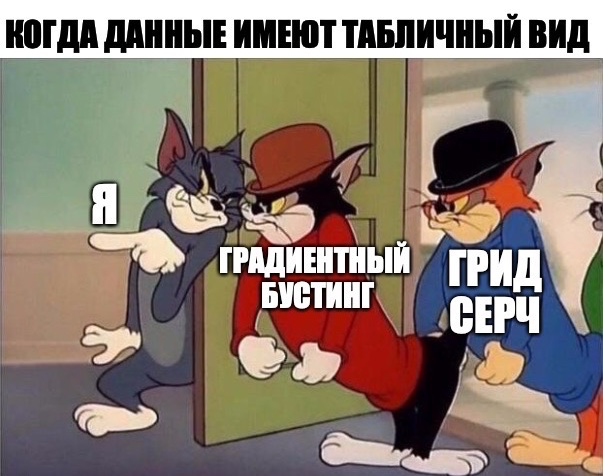

In [12]:
# Просмотр первых строк
df.head(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [13]:
# Просмотр последних строк
df.tail(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


In [14]:
# Просмотр информации о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [15]:
# Просмотр информации о датасете
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [16]:
# Выбор нужных колонок: df['col_name'] --> Series
print(type(df['Num_Bedrooms']))
df['Num_Bedrooms'].head(5)

<class 'pandas.core.series.Series'>


,Num_Bedrooms
0,2
1,3
2,1
3,1
4,2


In [17]:
# Выбор нужных колонок: df[['col_name']] --> DataFrame
print(type(df[['Num_Bedrooms']]))
df[['Num_Bedrooms']].head(5)

<class 'pandas.core.frame.DataFrame'>


,Num_Bedrooms
0,2
1,3
2,1
3,1
4,2


In [18]:
# Выбор нужных колонок через список
cols = ['Lot_Size', 'Garage_Size']
df[cols].head(5)

,Lot_Size,Garage_Size
0,0.599637,0
1,4.753014,1
2,3.634823,0
3,2.730667,1
4,4.699073,0


In [19]:
# Выбор нужных колонок через loc[rows, cols]
# : - все строки / колонки
cols = ['Lot_Size', 'Garage_Size']
df.loc[:, cols].head(5)

,Lot_Size,Garage_Size
0,0.599637,0
1,4.753014,1
2,3.634823,0
3,2.730667,1
4,4.699073,0


In [20]:
# Выбор нужных колонок через iloc[rows, cols]
# : - все строки / колонки
df.iloc[:, [1, 2]].head(5)

,Num_Bedrooms,Num_Bathrooms
0,2,1
1,3,3
2,1,2
3,1,2
4,2,1


In [21]:
# Частотность
df['Num_Bedrooms'].value_counts()

,count
Num_Bedrooms,
2,215
5,205
1,201
4,197
3,182


In [22]:
# Частотность c normalize
df['Num_Bedrooms'].value_counts(normalize=True, dropna=False)

,proportion
Num_Bedrooms,
2,0.215
5,0.205
1,0.201
4,0.197
3,0.182


In [23]:
# Посмотрим на список колонок в датафрейме
for col in df.columns:
  print(col)

Square_Footage
Num_Bedrooms
Num_Bathrooms
Year_Built
Lot_Size
Garage_Size
Neighborhood_Quality
House_Price


### Фильтрация и выбор данных

In [24]:
# Тут работают обычные срезы,  как в питоновских строках (start:end:step)
df[1:10:2]

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
1,4272,3,3,2016,4.753014,1,6,985260.854490
3,966,1,2,1977,2.730667,1,8,229698.918664
5,3944,5,3,1990,2.475930,2,8,879796.983522
7,3419,1,1,1972,2.805281,1,1,703413.110945
9,2185,4,2,1981,3.941604,2,5,504176.506059


In [25]:
# Фильтрация данных (простая)
print(df[df['Num_Bedrooms'] == 5].shape[0])
df[df['Num_Bedrooms'] == 5].head(5)

205


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
5,3944,5,3,1990,2.475930,2,8,8.797970e+05
12,2933,5,3,1973,4.781489,2,9,7.011338e+05
13,1684,5,3,1988,3.994202,1,8,4.407263e+05
15,4617,5,1,2005,4.357890,0,4,1.019193e+06
18,1582,5,2,1956,4.485289,1,5,3.962464e+05


In [26]:
# Фильтрация данных (простая) - выносим условие в переменную
cond = (df['Num_Bedrooms'] == 5)
df[cond].head(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
5,3944,5,3,1990,2.475930,2,8,8.797970e+05
12,2933,5,3,1973,4.781489,2,9,7.011338e+05
13,1684,5,3,1988,3.994202,1,8,4.407263e+05
15,4617,5,1,2005,4.357890,0,4,1.019193e+06
18,1582,5,2,1956,4.485289,1,5,3.962464e+05


In [27]:
# Фильтрация данных (с логическим И)
df[(df['Num_Bedrooms'] == 5) & (df['Num_Bathrooms'] == 3)].head(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
5,3944,5,3,1990,2.475930,2,8,879796.983522
12,2933,5,3,1973,4.781489,2,9,701133.804147
13,1684,5,3,1988,3.994202,1,8,440726.284816
28,1767,5,3,2009,1.073239,1,1,432357.906103
36,1100,5,3,2018,2.343827,0,1,318266.277132


In [28]:
# Фильтрация данных (с логическим И) - выносим условие в переменную
bedroom_cond = (df['Num_Bedrooms'] == 5)
bathroom_cond = (df['Num_Bathrooms'] == 3)

res = df[bedroom_cond & bathroom_cond]
print(res.shape[0])
res.head(5)

73


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
5,3944,5,3,1990,2.475930,2,8,879796.983522
12,2933,5,3,1973,4.781489,2,9,701133.804147
13,1684,5,3,1988,3.994202,1,8,440726.284816
28,1767,5,3,2009,1.073239,1,1,432357.906103
36,1100,5,3,2018,2.343827,0,1,318266.277132


In [29]:
# Фильтрация данных (с логическим ИЛИ)
bedroom_cond = (df['Num_Bedrooms'] == 5)
bathroom_cond = (df['Num_Bathrooms'] == 3)

res = df[bedroom_cond | bathroom_cond]
print(res.shape[0])
res.head(5)

455


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
1,4272,3,3,2016,4.753014,1,6,985260.854490
5,3944,5,3,1990,2.475930,2,8,879796.983522
8,630,3,3,1997,1.014286,1,8,173875.037216
11,2891,2,3,1982,3.978440,0,2,635097.395920
12,2933,5,3,1973,4.781489,2,9,701133.804147


In [30]:
# Фильтрация данных (с логическим НЕ)
bathroom_cond = (df['Num_Bathrooms'] == 3)

res = df[~bedroom_cond]
print(res.shape[0])
res.head(5)

795


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [31]:
df['Num_Bedrooms'].apply(lambda x: x + 10).head(5)

,Num_Bedrooms
0,12
1,13
2,11
3,11
4,12


In [32]:
# Фильтрация данных
bathroom_cond = (df['Num_Bathrooms'] == 3)
square_cond = (df['Square_Footage'].apply(lambda x: x + 100 < 1_000))
price_cond = (df['House_Price'].astype(str).str.contains('3'))

res = df[bathroom_cond | ~square_cond & price_cond]
print(res.shape[0])
res.head(5)

834


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,262382.852274
1,4272,3,3,2016,4.753014,1,6,985260.854490
2,3592,1,2,2016,3.634823,0,9,777977.390119
3,966,1,2,1977,2.730667,1,8,229698.918664
5,3944,5,3,1990,2.475930,2,8,879796.983522


In [33]:
# Выбор данных по условию (loc)
bathroom_cond = (df['Num_Bathrooms'] == 3)

print(df[bathroom_cond].shape)
print(df.loc[bathroom_cond].shape)
print(df.loc[bathroom_cond, :].shape)

(323, 8)
(323, 8)
(323, 8)


In [34]:
# Выбор данных по условию (loc)
bathroom_cond = (df['Num_Bathrooms'] == 3)
cols = ['Num_Bathrooms', 'Year_Built']

print(df[bathroom_cond][cols].shape)
print(df.loc[bathroom_cond, cols].shape)

(323, 2)
(323, 2)


In [35]:
# Выбор данных по условию (loc)
bathroom_cond = (df['Num_Bathrooms'] == 3)
cols = ['Num_Bathrooms', 'Year_Built']

print(df.shape)
print(df[:].shape)
print(df.iloc[:, :].shape)
print(df.iloc[[0, 1, 2, 3], [0, 1, 2, 3]].shape)

df.iloc[[0, 1, 2, 3], [0, 1, 2, 3]]

(1000, 8)
(1000, 8)
(1000, 8)
(4, 4)


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built
0,1360,2,1,1981
1,4272,3,3,2016
2,3592,1,2,2016
3,966,1,2,1977


### Очистка данных

In [36]:
df.isna().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [37]:
print(df.shape)
print(df.dropna().shape) # НЕ inplace, то есть возвращает новый датафрейм

(1000, 8)
(1000, 8)


In [38]:
for col in df.columns:
  if df[col].nunique() < 20:
    print(df[col].value_counts(), end='\n\n')

Num_Bedrooms
2    215
5    205
1    201
4    197
3    182
Name: count, dtype: int64

Num_Bathrooms
1    350
2    327
3    323
Name: count, dtype: int64

Garage_Size
2    343
1    336
0    321
Name: count, dtype: int64

Neighborhood_Quality
10    123
5     109
2     105
7     102
6     101
4      99
8      97
1      91
9      88
3      85
Name: count, dtype: int64



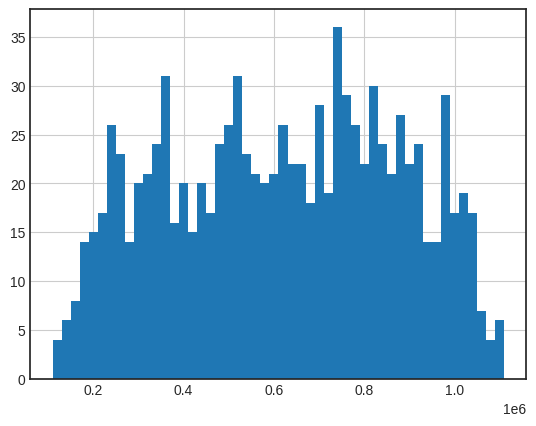

In [39]:
# Встроенная гистограмма без доп настроек
df['House_Price'].hist(bins=50);

In [40]:
# Предположим, что значение House_Price от 1_000_000 и выше - это выброс
print(df.shape)
df = df[df['House_Price'] < 1_000_000]
print(df.shape)

(1000, 8)
(938, 8)


In [41]:
print(df['House_Price'].min(), df['House_Price'].max())

111626.85342361582 998439.2371139774


### Манипуляции с данными (сортировка)

In [42]:
# Сортировка по одному столбцу Num_Bathrooms по возрастанию (по умолчанию)
sampled_df = df.sample(10)

sampled_df[['Num_Bathrooms', 'House_Price']].sort_values(by='Num_Bathrooms')

,Num_Bathrooms,House_Price
186,1,491715.947664
883,1,354744.630595
108,1,758977.881868
308,1,934942.057133
565,1,951484.547365
348,1,827205.303959
18,2,396246.358889
523,2,795928.181827
971,3,345655.794855
199,3,918893.743924


In [43]:
# Сортировка по одному столбцу House_Price по убыванию
sampled_df = df.sample(10)

sampled_df[['Num_Bathrooms', 'House_Price']].sort_values(by='House_Price', ascending=False)

,Num_Bathrooms,House_Price
915,2,865263.383636
798,1,852599.975056
609,1,629609.098468
488,1,574450.484182
750,3,572608.431397
514,2,526951.775761
334,2,474045.842712
606,3,417900.590937
691,1,416605.607253
452,2,302975.303763


In [44]:
# Сортировка по двум столбцам по возрастанию (по умолчанию)
sampled_df = df.sample(10)

sampled_df[['Num_Bathrooms', 'House_Price']].sort_values(by=['Num_Bathrooms', 'House_Price'])

,Num_Bathrooms,House_Price
311,1,342303.689268
455,1,559262.322359
885,1,733900.755907
903,1,809712.737933
348,1,827205.303959
718,2,357130.120282
373,2,381998.608659
215,2,624112.160020
42,3,666733.473462
527,3,887527.907180


In [45]:
# Сортировка по двум столбцам по убыванию
sampled_df = df.sample(10)

sampled_df[['Num_Bathrooms', 'House_Price']].sort_values(by=['Num_Bathrooms', 'House_Price'], ascending=False)

,Num_Bathrooms,House_Price
781,3,749471.424149
42,3,666733.473462
750,3,572608.431397
29,3,434165.896634
389,3,367024.379433
680,3,305026.770755
229,2,971977.024641
557,2,736289.124555
442,2,501720.675722
505,1,269874.715904


In [46]:
# Сортировка по двум столбцам в разном порядке
sampled_df = df.sample(10)

sampled_df[['Num_Bathrooms', 'House_Price']].sort_values(by=['Num_Bathrooms', 'House_Price'], ascending=[True, False])

,Num_Bathrooms,House_Price
761,1,755402.372691
657,1,734156.816086
86,1,730047.497388
84,1,721018.063903
942,1,564747.654644
677,1,522309.405872
490,2,269665.861398
787,3,706686.320943
984,3,560889.792969
606,3,417900.590937


### Манипуляции с данными (группировка)

In [47]:
df['House_Price'] = df['House_Price'].apply(lambda x: round(x, 1))

In [48]:
df.groupby(by='Num_Bathrooms').mean()

,Square_Footage,Num_Bedrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Num_Bathrooms,,,,,,,
1,2743.276276,2.924925,1987.132132,2.686212,0.996997,5.561562,594622.287087
2,2703.601974,3.003289,1985.197368,2.688263,0.990132,5.677632,594159.709211
3,2597.780731,2.993355,1986.056478,2.810804,1.046512,5.647841,584064.319934


In [49]:
df.groupby(by='Num_Bathrooms')['House_Price'].mean()

,House_Price
Num_Bathrooms,
1,594622.287087
2,594159.709211
3,584064.319934


In [50]:
df.groupby(by='Num_Bathrooms').agg({'House_Price': 'mean'})

,House_Price
Num_Bathrooms,
1,594622.287087
2,594159.709211
3,584064.319934


In [51]:
df.groupby(by='Num_Bathrooms').agg({'House_Price': ['min', 'sum', 'mean'], 'Year_Built': 'max'})

House_Price                             Year_Built
                      min          sum           mean        max
Num_Bathrooms                                                   
1                111626.9  198009221.6  594622.287087       2022
2                120795.6  180624551.6  594159.709211       2022
3                140538.1  175803360.3  584064.319934       2022

In [52]:
df.groupby(by=['Num_Bathrooms', 'Num_Bedrooms']).agg({'House_Price': 'min'})

House_Price
Num_Bathrooms Num_Bedrooms             
1             1                146406.9
              2                111626.9
              3                149743.5
              4                147601.6
              5                213397.8
2             1                181191.1
              2                158856.8
              3                120795.6
              4                155471.2
              5                158636.7
3             1                146020.4
              2                172534.4
              3                173875.0
              4                191907.7
              5                140538.1

In [53]:
df.groupby(by=['Num_Bedrooms', 'Num_Bathrooms']).agg({'House_Price': 'min'})

House_Price
Num_Bedrooms Num_Bathrooms             
1            1                 146406.9
             2                 181191.1
             3                 146020.4
2            1                 111626.9
             2                 158856.8
             3                 172534.4
3            1                 149743.5
             2                 120795.6
             3                 173875.0
4            1                 147601.6
             2                 155471.2
             3                 191907.7
5            1                 213397.8
             2                 158636.7
             3                 140538.1

In [54]:
df.groupby(by='Num_Bathrooms').agg(new_columns=("House_Price", "min"))

,new_columns
Num_Bathrooms,
1,111626.9
2,120795.6
3,140538.1


### Объединение данных

In [55]:
extra_df = pd.DataFrame({
    'year': [2012, 2015],
    'extra': ["Это был счастливый 2012 год", "Это был обычный 2015 год"]
})

extra_df

,year,extra
0,2012,Это был счастливый 2012 год
1,2015,Это был обычный 2015 год


In [56]:
res = df.merge(extra_df, left_on='Year_Built', right_on='year', how='left')

print(res.shape[0])
print(res['Year_Built'].unique())
print(res['extra'].isna().sum())

res.head(5)

938
[1981 2016 1977 1990 2012 1972 1997 2006 1982 1973 1988 1983 1986 1956
 2017 2005 2014 1996 1969 1968 1978 2009 1967 1984 1992 1960 1998 1987
 2013 2018 1957 1980 1953 1999 1979 1994 1975 1976 1995 2000 1955 2008
 1964 1991 2022 1966 1971 1962 2002 1952 1970 1993 1950 1954 1985 2003
 1961 2019 2001 2004 2011 2021 2010 1959 2015 2020 1974 1958 1963 1965
 1989 1951 2007]
916


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,year,extra
0,1360,2,1,1981,0.599637,0,5,262382.9,NaN,NaN
1,4272,3,3,2016,4.753014,1,6,985260.9,NaN,NaN
2,3592,1,2,2016,3.634823,0,9,777977.4,NaN,NaN
3,966,1,2,1977,2.730667,1,8,229698.9,NaN,NaN
4,3944,5,3,1990,2.475930,2,8,879797.0,NaN,NaN


In [57]:
res = df.merge(extra_df, left_on='Year_Built', right_on='year', how='inner')

print(res.shape[0])
print(res['Year_Built'].unique())
print(res['extra'].isna().sum())

res.head(5)


22
[2012 2015]
0


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,year,extra
0,3671,1,2,2012,4.911960,0,1,814427.9,2012,Это был счастливый 2012 год
1,2070,3,3,2012,2.937409,2,7,525582.3,2012,Это был счастливый 2012 год
2,1198,3,2,2012,3.866021,2,5,346152.8,2012,Это был счастливый 2012 год
3,697,2,3,2015,2.327053,1,7,216592.0,2015,Это был обычный 2015 год
4,2549,5,3,2015,4.374704,2,3,656223.2,2015,Это был обычный 2015 год


### Построение простых визуализаций

In [58]:
res = df.groupby(by='Year_Built').agg({'House_Price': 'mean'}).reset_index()
res.head(5)

,Year_Built,House_Price
0,1950,636577.283333
1,1951,709195.033333
2,1952,669732.537500
3,1953,504927.492308
4,1954,467964.650000


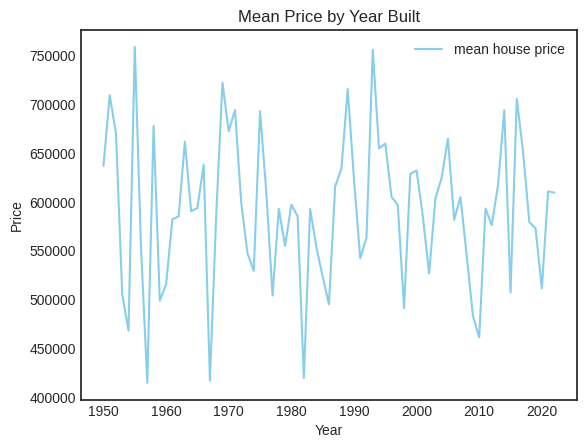

In [59]:
plt.plot(res['Year_Built'], res['House_Price'], color='skyblue', label='mean house price')

plt.title('Mean Price by Year Built')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.show()

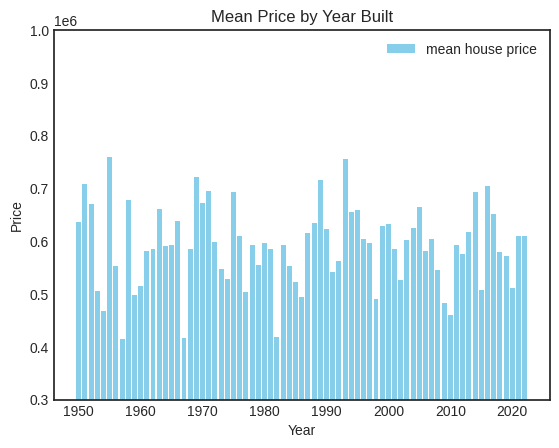

In [60]:
plt.bar(res['Year_Built'], res['House_Price'], color='skyblue', label='mean house price')

plt.title('Mean Price by Year Built')
plt.ylabel('Price')
plt.xlabel('Year')
plt.ylim(300_000, 1_000_000)
plt.legend()
plt.show()

## Задача классификации (на табличных данных)

### Метрики

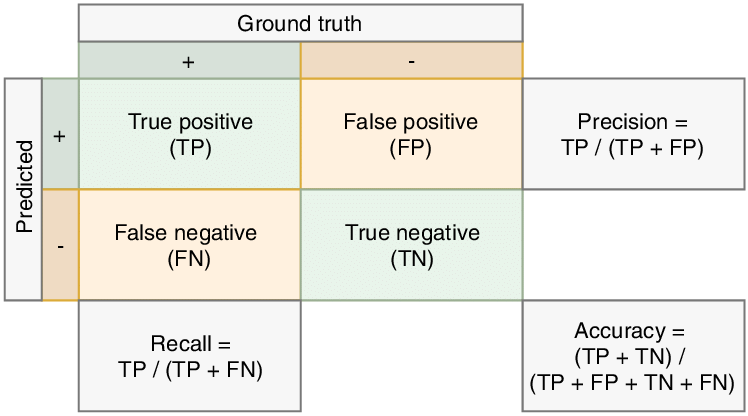

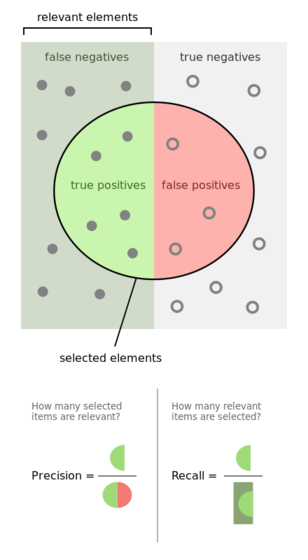

In [61]:
df[:5]

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,262382.9
1,4272,3,3,2016,4.753014,1,6,985260.9
2,3592,1,2,2016,3.634823,0,9,777977.4
3,966,1,2,1977,2.730667,1,8,229698.9
5,3944,5,3,1990,2.475930,2,8,879797.0


In [62]:
print("Минимальное значение:", df['House_Price'].min())
print("Максимальное значение:", df['House_Price'].max())
print("Среднее значение:", round(df['House_Price'].mean(), 1))
print("Медианное значение:", df['House_Price'].median())

Минимальное значение: 111626.9
Максимальное значение: 998439.2
Среднее значение: 591084.4
Медианное значение: 605040.4


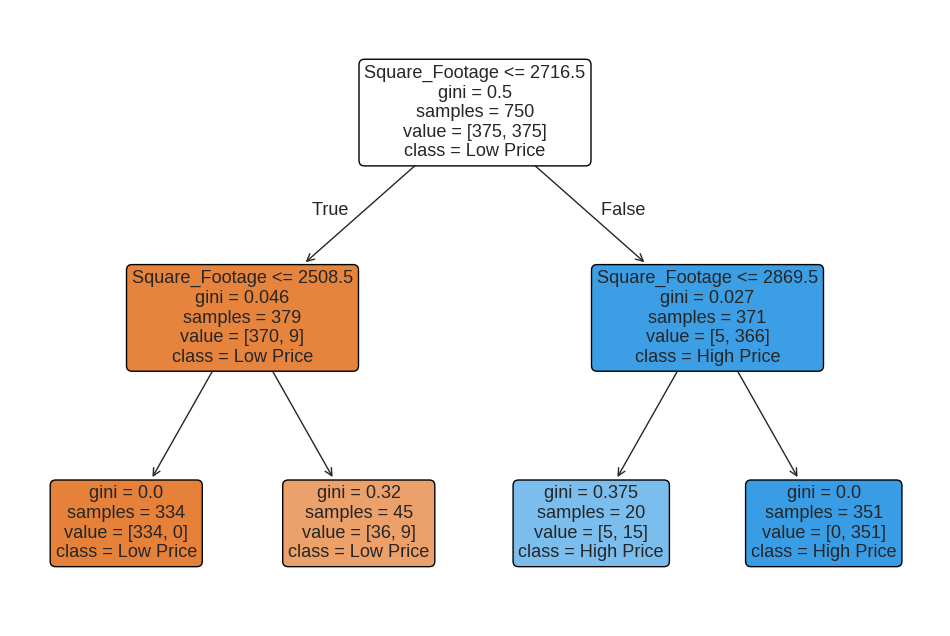

In [63]:
# Создание бинарного таргета на основе House_Price
median_price = df['House_Price'].median()
y = (df['House_Price'] > median_price).astype(int)

# Определяем признаки
X = df.drop(['House_Price'], axis=1) # НЕ inplace операция

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Создание и обучение дерева решений
clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(X_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Low Price', 'High Price'], rounded=True)
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        94
           1       1.00      0.95      0.97        94

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

ROC AUC: 1.00


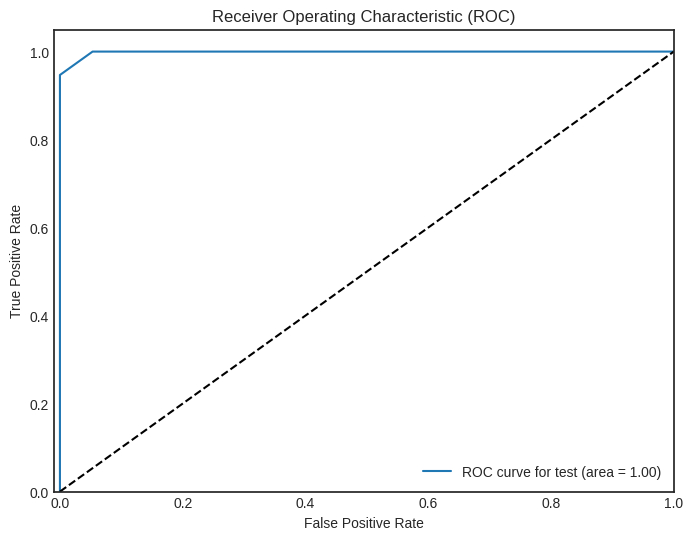

In [64]:
# Предсказания на тестовой выборке
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Классификационный отчёт
classification_rep = classification_report(y_test, y_pred)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Печать результатов
print("Classification Report:\n", classification_rep)
print(f"ROC AUC: {roc_auc:.2f}")

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve for test (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

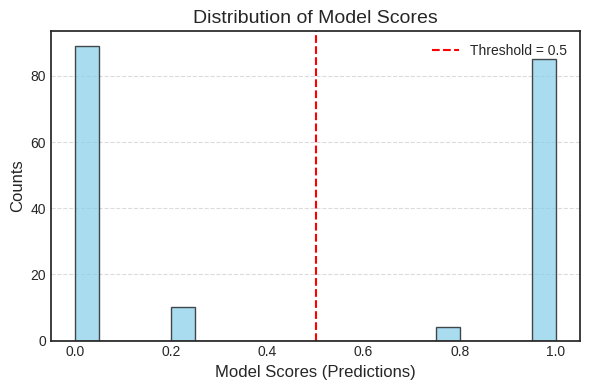

In [65]:
# Визуализаци распределения сокров модели
plt.figure(figsize=(6, 4))
plt.hist(y_pred_proba, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1.5, label='Threshold = 0.5')
plt.xlabel('Model Scores (Predictions)', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Distribution of Model Scores', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
# Пример новых данных
new_data = pd.DataFrame({
    'Square_Footage': [3000, 10],
    'Num_Bedrooms': [1, 0],
    'Num_Bathrooms': [1, 0],
    'Year_Built': [2018, 1730],
    'Lot_Size': [0.6, 0.6],
    'Garage_Size': [0, 0],
    'Neighborhood_Quality': [1, 0]
})

new_data["model_prediction"] = clf.predict(new_data[clf.feature_names_in_])
new_data["model_score"] = clf.predict_proba(new_data[clf.feature_names_in_])[:, 1] # [0 класс, 1 класс] <-- интересует только 1

new_data

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,model_prediction,model_score
0,3000,1,1,2018,0.6,0,1,1,1.0
1,10,0,0,1730,0.6,0,0,0,0.0


## Задача регрессии (на табличных данных)

### Метрики

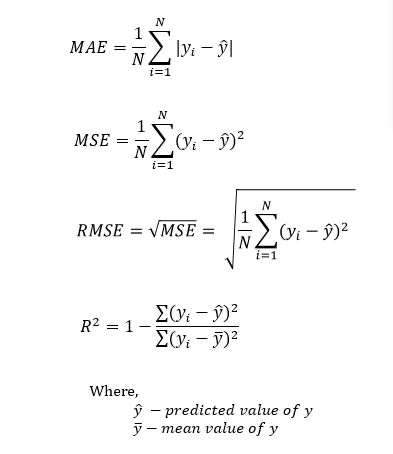

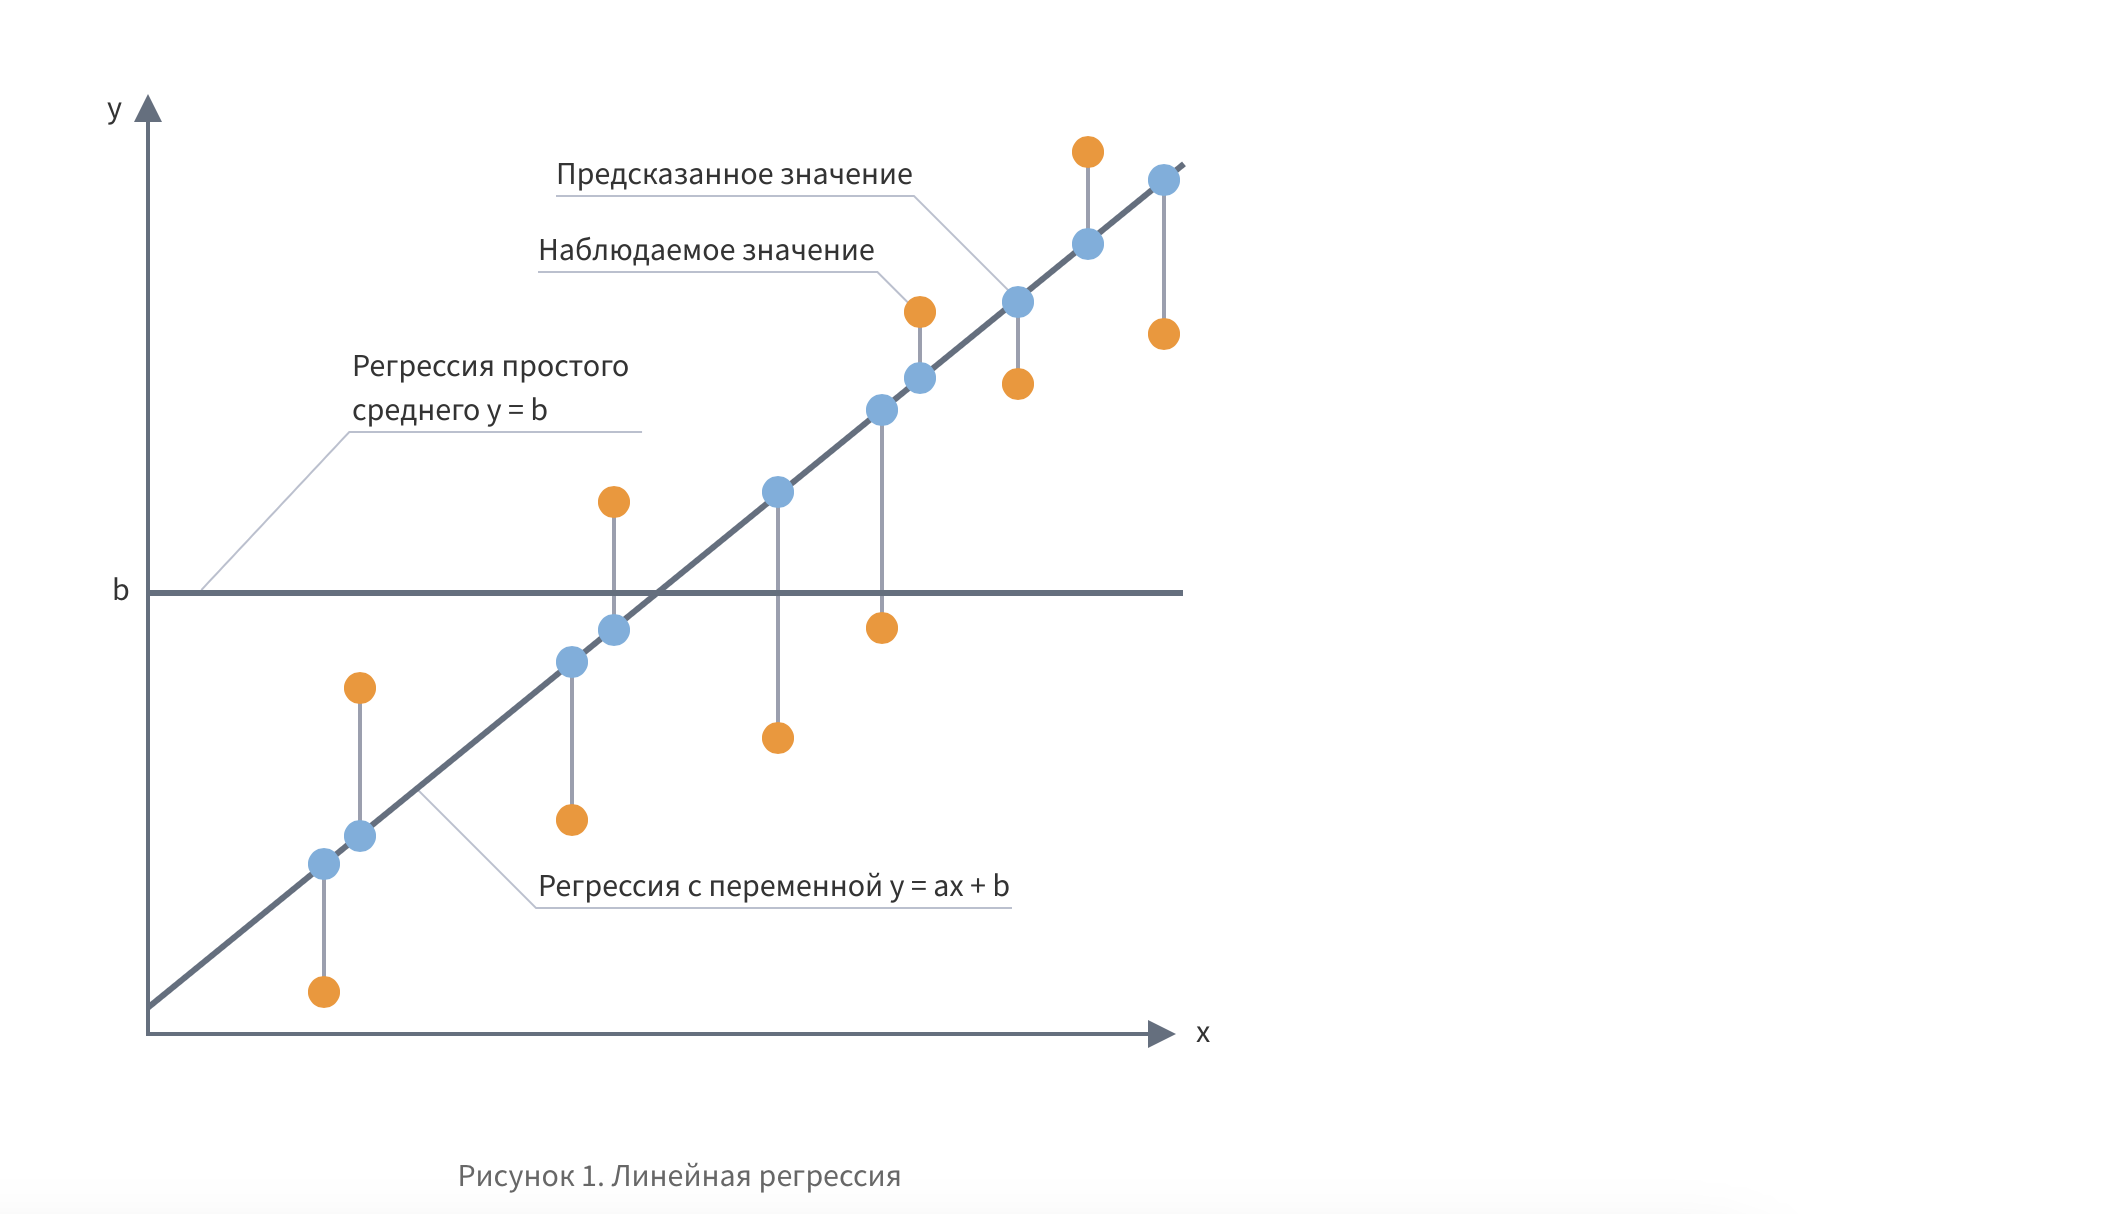

Mean Squared Error: 16503633437.08
Mean Absolute Error: 0.29
Mean Absolute Percentage Error: 0.29
R-squared: 0.74


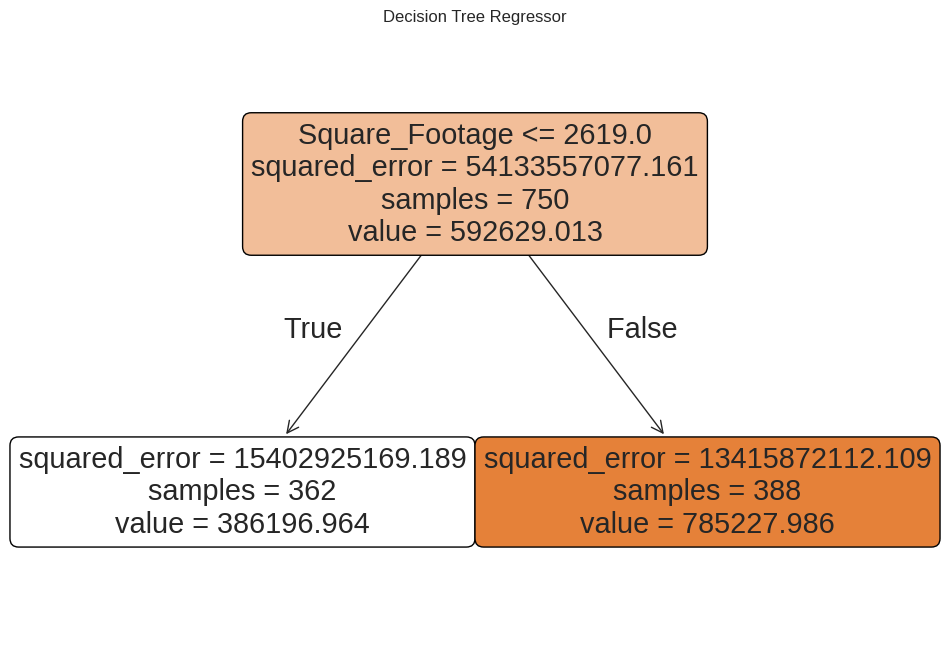

In [67]:
# Решение задачи регрессии

# Определяем признаки и целевой столбец (House_Price как таргет)
X = df.drop(['House_Price'], axis=1)
y = df['House_Price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение дерева решений для регрессии
regressor = DecisionTreeRegressor(random_state=42, max_depth=1)
regressor.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = regressor.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Вывод метрик
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mape:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}")
print(f"R-squared: {r2:.2f}")

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True)
plt.title('Decision Tree Regressor')
plt.show()

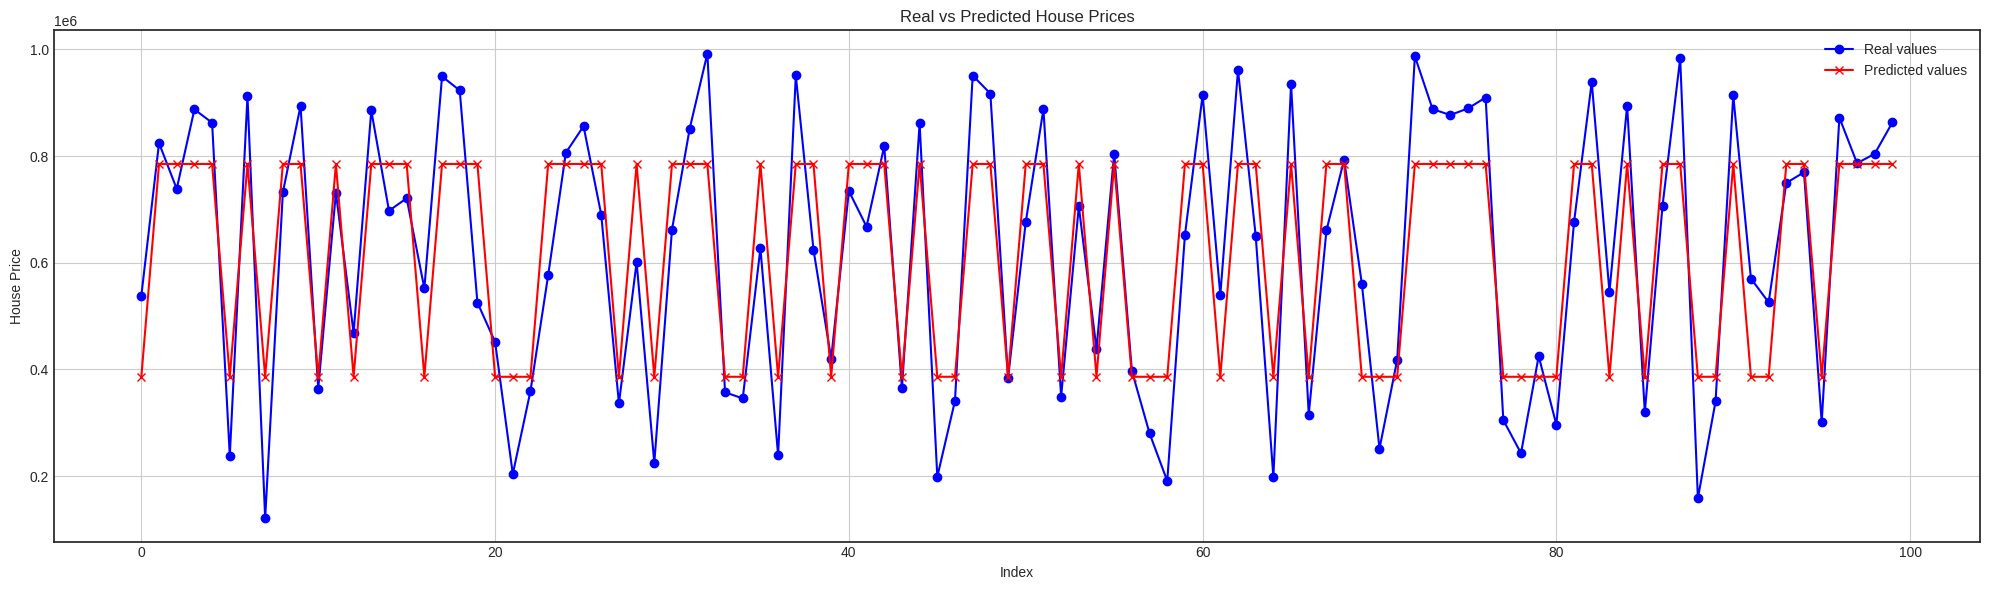

In [68]:
# Построение графика с реальными и предсказанными значениями
plt.figure(figsize=(20, 6))

# График реальных значений
plt.plot(y_test.values[:100], label='Real values', marker='o', linestyle='-', color='blue')

# График предсказанных значений
plt.plot(y_pred[:100], label='Predicted values', marker='x', color='red')

plt.xlabel('Index')
plt.ylabel('House Price')
plt.title('Real vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
# Пример новых данных
new_data = pd.DataFrame({
    'Square_Footage': [3000, 10],
    'Num_Bedrooms': [1, 0],
    'Num_Bathrooms': [1, 0],
    'Year_Built': [2018, 1730],
    'Lot_Size': [0.6, 0.6],
    'Garage_Size': [0, 0],
    'Neighborhood_Quality': [1, 0]
})

new_data["model_prediction"] = regressor.predict(new_data[regressor.feature_names_in_])

new_data

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,model_prediction
0,3000,1,1,2018,0.6,0,1,785227.986082
1,10,0,0,1730,0.6,0,0,386196.963812


## Переобучение модели

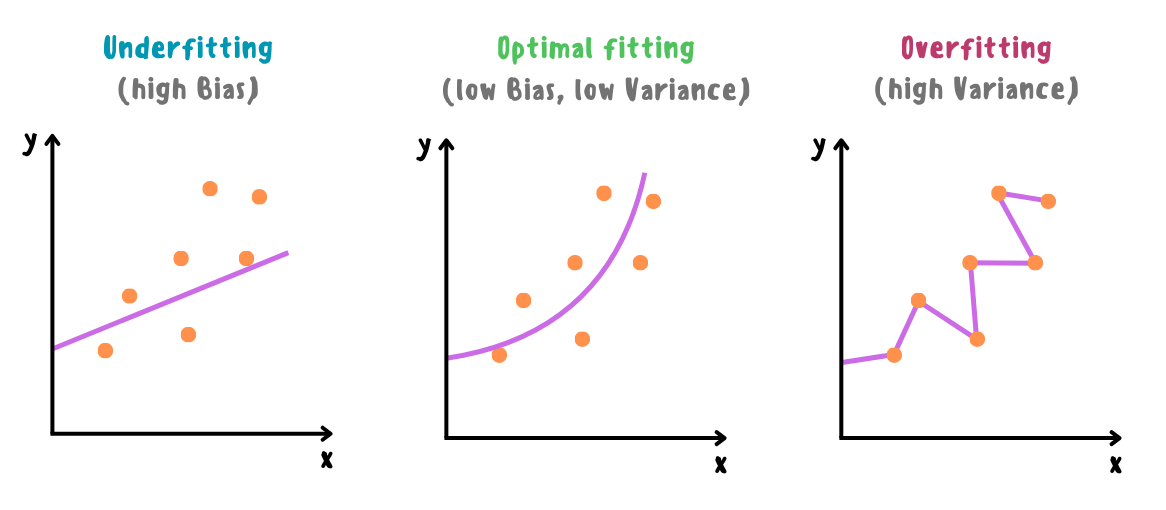

## Задача классификации (нейронная сеть)

In [70]:
df.head(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,262382.9
1,4272,3,3,2016,4.753014,1,6,985260.9
2,3592,1,2,2016,3.634823,0,9,777977.4
3,966,1,2,1977,2.730667,1,8,229698.9
5,3944,5,3,1990,2.475930,2,8,879797.0


In [71]:
# Создание бинарного таргета на основе House_Price
median_price = df['House_Price'].median()
y = (df['House_Price'] > median_price).astype(int).values

# Подготовка данных
X = df.drop(['House_Price'], axis=1)
feature_names = list(X.columns)
X = X.values


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Стандартизация данных (хотя для TabNet можно не использовать стандартизацию, это не обязательно)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Создание и обучение модели TabNet
clf = TabNetClassifier()

# Обучение модели
clf.fit(X_train_scaled, y_train, max_epochs=50, patience=10, batch_size=64, drop_last=False)


epoch 0  | loss: 0.64725 |  0:00:01s
epoch 1  | loss: 0.26149 |  0:00:02s
epoch 2  | loss: 0.11365 |  0:00:03s
epoch 3  | loss: 0.10369 |  0:00:04s
epoch 4  | loss: 0.11467 |  0:00:05s
epoch 5  | loss: 0.08374 |  0:00:05s
epoch 6  | loss: 0.08016 |  0:00:06s
epoch 7  | loss: 0.07691 |  0:00:07s
epoch 8  | loss: 0.17067 |  0:00:07s
epoch 9  | loss: 0.11183 |  0:00:08s
epoch 10 | loss: 0.05866 |  0:00:09s
epoch 11 | loss: 0.08524 |  0:00:10s
epoch 12 | loss: 0.06048 |  0:00:10s
epoch 13 | loss: 0.08622 |  0:00:11s
epoch 14 | loss: 0.07512 |  0:00:12s
epoch 15 | loss: 0.06586 |  0:00:12s
epoch 16 | loss: 0.07808 |  0:00:13s
epoch 17 | loss: 0.08072 |  0:00:13s
epoch 18 | loss: 0.08766 |  0:00:14s
epoch 19 | loss: 0.09924 |  0:00:14s
epoch 20 | loss: 0.05452 |  0:00:15s
epoch 21 | loss: 0.0666  |  0:00:16s
epoch 22 | loss: 0.06541 |  0:00:17s
epoch 23 | loss: 0.13512 |  0:00:18s
epoch 24 | loss: 0.07217 |  0:00:19s
epoch 25 | loss: 0.08298 |  0:00:20s
epoch 26 | loss: 0.06007 |  0:00:21s
e

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        94
           1       1.00      0.96      0.98        94

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

ROC AUC: 1.00


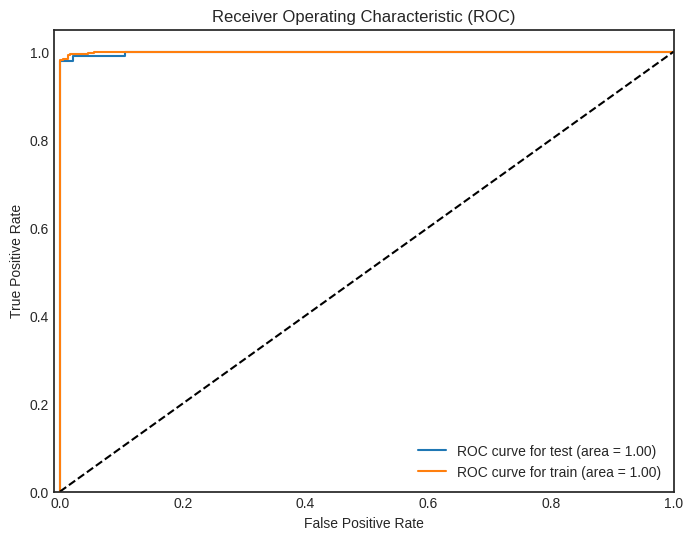

In [72]:
# Предсказания на тестовой выборке
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

y_train_pred = clf.predict(X_train_scaled)
y_train_pred_proba = clf.predict_proba(X_train_scaled)[:, 1]

# Классификационный отчёт
classification_rep = classification_report(y_test, y_pred)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred_proba)

# Печать результатов
print("Classification Report:\n", classification_rep)
print(f"ROC AUC: {roc_auc:.2f}")

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve for test (area = {roc_auc:.2f})')
plt.plot(fpr_train, tpr_train, label=f'ROC curve for train (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [73]:
# Пример новых данных
new_data = pd.DataFrame({
    'Square_Footage': [3000, 10],
    'Num_Bedrooms': [1, 0],
    'Num_Bathrooms': [1, 0],
    'Year_Built': [2018, 1730],
    'Lot_Size': [0.6, 0.6],
    'Garage_Size': [0, 0],
    'Neighborhood_Quality': [1, 0]
})

new_data_scaled = scaler.transform(new_data[feature_names])
new_data_scaled
new_data["model_prediction"] = clf.predict(new_data_scaled)
new_data["model_score"] = clf.predict_proba(new_data_scaled)[:, 1]

new_data

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,model_prediction,model_score
0,3000,1,1,2018,0.6,0,1,1,7.936754e-01
1,10,0,0,1730,0.6,0,0,0,3.213897e-15


## Нейронная сеть своими руками  

In [74]:
# Создание бинарного таргета на основе House_Price
median_price = df['House_Price'].median()
y = (df['House_Price'] > median_price).astype(int).values

# Подготовка данных
X = df.drop(['House_Price'], axis=1)
feature_names = list(X.columns)
X = X.values

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Преобразование данных в тензоры
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Определение простой нейронной сети
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 16)  # Первый скрытый слой с 16 нейронами
        self.fc2 = nn.Linear(16, 1)  # Выходной слой
        self.sigmoid = nn.Sigmoid()  # Сигмоидная активация на выходе

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)  # ReLU активация для первого слоя
        x = self.fc2(x)
        x = self.sigmoid(x)  # Сигмоидная активация на выходе
        return x

# Инициализация модели
model = SimpleNN()

# Определение функции потерь и оптимизатора
criterion = nn.BCELoss()  # Бинарная кросс-энтропия
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Оптимизатор Adam

# Обучение модели
num_epochs = 200
for epoch in range(num_epochs):
    model.train()  # Переводим модель в режим обучения
    optimizer.zero_grad()  # Обнуляем градиенты
    outputs = model(X_train_tensor)  # Прямой проход (forward pass)
    loss = criterion(outputs, y_train_tensor)  # Рассчитываем ошибку
    loss.backward()  # Обратное распространение ошибки
    optimizer.step()  # Шаг оптимизатора

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/200], Loss: 0.6852
Epoch [20/200], Loss: 0.6694
Epoch [30/200], Loss: 0.6536
Epoch [40/200], Loss: 0.6377
Epoch [50/200], Loss: 0.6215
Epoch [60/200], Loss: 0.6050
Epoch [70/200], Loss: 0.5881
Epoch [80/200], Loss: 0.5708
Epoch [90/200], Loss: 0.5532
Epoch [100/200], Loss: 0.5355
Epoch [110/200], Loss: 0.5176
Epoch [120/200], Loss: 0.4995
Epoch [130/200], Loss: 0.4814
Epoch [140/200], Loss: 0.4632
Epoch [150/200], Loss: 0.4450
Epoch [160/200], Loss: 0.4271
Epoch [170/200], Loss: 0.4095
Epoch [180/200], Loss: 0.3924
Epoch [190/200], Loss: 0.3759
Epoch [200/200], Loss: 0.3600


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        94
           1       0.97      0.95      0.96        94

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

ROC AUC: 1.00


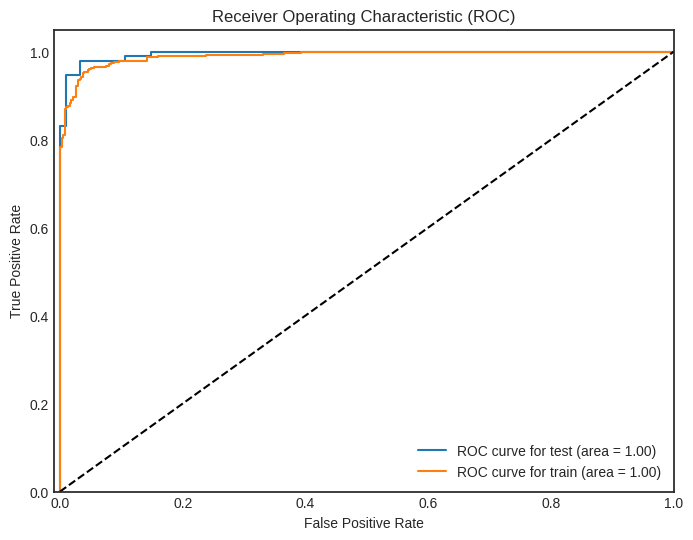

In [75]:
model.eval()
with torch.no_grad():
    y_proba = model(X_test_tensor).numpy().squeeze()
    y_pred = (model(X_test_tensor) > 0.5).int().numpy().squeeze()

    y_train_proba = model(X_train_tensor).numpy().squeeze()
    y_train_pred = (model(X_train_tensor) > 0.5).int().numpy().squeeze()


# Классификационный отчёт
classification_rep = classification_report(y_test, y_pred)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)

# ROC кривая
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_proba)

# Печать результатов
print("Classification Report:\n", classification_rep)
print(f"ROC AUC: {roc_auc:.2f}")

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve for test (area = {roc_auc:.2f})')
plt.plot(fpr_train, tpr_train, label=f'ROC curve for train (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Коробочное решение для картинок

In [76]:
# Пример с использованием PyTorch и ResNet18:

# Загрузка меток классов из ImageNet
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
labels = requests.get(LABELS_URL).json()

# Загрузка предобученной модели ResNet18
model = models.resnet18(pretrained=True)
model.eval()  # Перевод модели в режим оценки

# Преобразования для изображения: изменение размера, обрезка и нормализация
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def get_prediction(img):
  # Применение преобразований
  img_tensor = preprocess(img)
  img_tensor = img_tensor.unsqueeze(0)  # Добавляем размер для батча

  # Предсказание
  with torch.no_grad():
      outputs = model(img_tensor)

  # Применение softmax для получения вероятностей
  probabilities = F.softmax(outputs, dim=1)

  # Получение предсказанного класса
  _, predicted_idx = torch.max(outputs, 1)
  predicted_label = labels[predicted_idx.item()]

  # Выводим предсказанный класс и вероятность
  predicted_prob = probabilities[0][predicted_idx].item()
  print(f'Предсказанный класс: {predicted_label}')
  print(f'Вероятность: {predicted_prob:.4f}')


#### Эксперименты

Предсказанный класс: sunglass
Вероятность: 0.4367


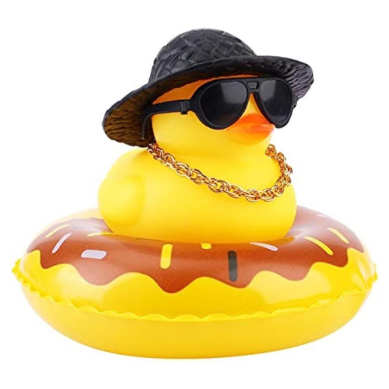

Предсказанный класс: Samoyed
Вероятность: 0.9784


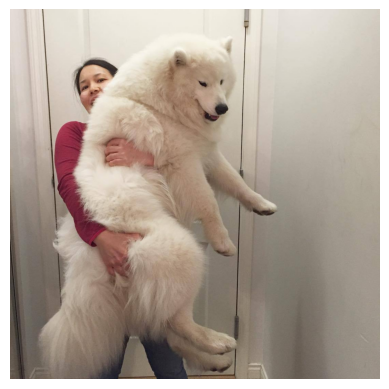

In [77]:
# Путь к директории
directory = '/content/drive/My Drive/ds/поток_N/'

# Получение списка файлов в директории
files = [directory + file_name for file_name in os.listdir(directory)]


for file in files:

  # Загрузка картинки
  img = Image.open(file)

  # Получение предсказания
  get_prediction(img)

  # Отрисовка картинки
  plt.imshow(img)
  plt.axis('off')
  plt.show()

## Генерация текста с помощью Yandex GPT

In [78]:
# Я спрятала все свои креды в yandex_oauth.py
from yandex_oauth import OAUTH_TOKEN, FOLDER_ID, CLOUD_ID

**Инструкция:**

1. Нужно зарегистрироваться в Yandex Cloud (в том числе нужно привязать свою платежную карту)
2. Получить свой постоянный OAUTH_TOKEN можно тут https://yandex.cloud/ru/docs/iam/operations/iam-token/create
3. После этого нужно обменять OAUTH_TOKEN на IAM_TOKEN (время жизни до 12 часов)
4. Далее нам понадобится узнать cloud_id и folder_id через get запросы
5. Ура! Теперь можно отправлять запросы

### Обмен OAUTH_TOKEN на IAM_TOKEN

In [79]:
# URL для получения IAM токена
url = "https://iam.api.cloud.yandex.net/iam/v1/tokens"

# Тело запроса
data = {
    "yandexPassportOauthToken": OAUTH_TOKEN
}

# Запрос IAM токена
response = requests.post(url, json=data)

# Проверка ответа
if response.status_code == 200:
    iam_token = response.json()["iamToken"]
    expires_at = response.json()["expiresAt"]
    print(f"IAM Token expiresAt: {expires_at}")
else:
    print(f"Ошибка: {response.status_code}, {response.text}")

IAM Token expiresAt: 2024-10-07T08:59:26.018145705Z


### Получение cloud_id

In [80]:
# URL для получения списка облаков
url = "https://resource-manager.api.cloud.yandex.net/resource-manager/v1/clouds"

# Заголовки запроса, включая авторизацию
headers = {
    "Authorization": f"Bearer {iam_token}"
}

# Отправка GET-запроса
response = requests.get(url, headers=headers)

# Проверка результата
if response.status_code == 200:
    print("Успешно")
    # print(response.json())  # Вывод списка облаков в формате JSON
else:
    print(f"Ошибка: {response.status_code}")
    print(response.text)

Успешно


### Получение списка доступных папок

In [81]:
# URL Yandex Cloud API для получения списка папок
url = f"https://resource-manager.api.cloud.yandex.net/resource-manager/v1/folders?cloudId={CLOUD_ID}"

# Заголовки запроса (включая авторизацию)
headers = {
    "Authorization": f"Bearer {iam_token}"
}

# Выполнение GET-запроса
response = requests.get(url, headers=headers)

# Проверка ответа и вывод результата
if response.status_code == 200:
    print("Успешно")
    # print(response.json())  # Печатает список папок в формате JSON
else:
    print(f"Ошибка: {response.status_code}")
    print(response.text)

Успешно


### Функция для отправки запроса в Yandex GPT

In [82]:
URL = "https://llm.api.cloud.yandex.net/foundationModels/v1/completion"

def run(user_text, iam_token=iam_token, folder_id=FOLDER_ID):
    # Собираем запрос
    data = {
        "modelUri": f"gpt://{folder_id}/yandexgpt",
        "completionOptions": {"temperature": 0.3, "maxTokens": 1000},
        "messages": [
            {"role": "system", "text": "Мой запрос: "},
            {"role": "user", "text": f"{user_text}"}
        ]
    }
    headers = {
        "Accept": "application/json",
        "Authorization": f"Bearer {iam_token}"
    }

    # Отправляем запрос
    response = requests.post(URL, headers=headers, json=data).json()

    #Распечатываем результат
    return response['result']['alternatives'][0]['message']['text']


### Эксперименты

In [83]:
result = run(user_text="Как выучить Python за 3 дня?")
print(result)

Изучение языка программирования Python за три дня — это очень амбициозная цель, и она может потребовать значительных усилий. Вот несколько шагов, которые могут помочь вам в изучении Python:

1. **Определите свои цели.** Прежде чем начать изучение, определите, что именно вы хотите достичь с помощью Python. Это поможет вам сосредоточиться на конкретных навыках и темах.

2. **Выберите ресурсы для изучения.** Существует множество онлайн-курсов, книг и видеоуроков по Python. Выберите те, которые соответствуют вашим целям и уровню подготовки.

3. **Начните с основ.** Изучите основные концепции Python, такие как переменные, типы данных, операторы, условия и циклы. Это основа, которая позволит вам создавать простые программы.

4. **Практикуйтесь.** Решайте задачи и создавайте небольшие программы, чтобы закрепить полученные знания. Вы можете найти задачи на сайтах, таких как HackerRank или LeetCode.

5. **Используйте интерактивные среды разработки.** Такие среды, как IDLE или Jupyter Notebook, 